In [6]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import simpleaudio as sa
from itertools import repeat

In [8]:
sargamdict = {"sa":261,
             "re":294,
             "ga":330,
             "ma":349,
             "pa":392,
             "dha":440,
             "ni":494,
             "sa1":515}

In [9]:
def play_audio(audio):# normalize to 16-bit range
    audio *= 32767 / np.max(np.abs(audio))
    # convert to 16-bit data
    audio = audio.astype(np.int16)

    # start playback
    play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

    # wait for playback to finish before exiting
    play_obj.wait_done()

In [10]:
sample_rate = 44100
T = 0.25
t = np.linspace(0, T, int(T*sample_rate), endpoint=False)
print(t[::100])

[0.         0.00226757 0.00453515 0.00680272 0.00907029 0.01133787
 0.01360544 0.01587302 0.01814059 0.02040816 0.02267574 0.02494331
 0.02721088 0.02947846 0.03174603 0.03401361 0.03628118 0.03854875
 0.04081633 0.0430839  0.04535147 0.04761905 0.04988662 0.0521542
 0.05442177 0.05668934 0.05895692 0.06122449 0.06349206 0.06575964
 0.06802721 0.07029478 0.07256236 0.07482993 0.07709751 0.07936508
 0.08163265 0.08390023 0.0861678  0.08843537 0.09070295 0.09297052
 0.0952381  0.09750567 0.09977324 0.10204082 0.10430839 0.10657596
 0.10884354 0.11111111 0.11337868 0.11564626 0.11791383 0.12018141
 0.12244898 0.12471655 0.12698413 0.1292517  0.13151927 0.13378685
 0.13605442 0.138322   0.14058957 0.14285714 0.14512472 0.14739229
 0.14965986 0.15192744 0.15419501 0.15646259 0.15873016 0.16099773
 0.16326531 0.16553288 0.16780045 0.17006803 0.1723356  0.17460317
 0.17687075 0.17913832 0.1814059  0.18367347 0.18594104 0.18820862
 0.19047619 0.19274376 0.19501134 0.19727891 0.19954649 0.20181

In [11]:
# generate sine wave notes for sa re ga ma
Sa_note = np.sin(sargamdict["sa"] * t * 3 * np.pi)
Re_note = np.sin(sargamdict["re"] * t * 3 * np.pi)
Ga_note = np.sin(sargamdict["ga"] * t * 3* np.pi)
Ma_note = np.sin(sargamdict["ma"] * t * 3 * np.pi)
Pa_note = np.sin(sargamdict["pa"] * t * 3 * np.pi)
Dha_note = np.sin(sargamdict["dha"] * t * 3 * np.pi)
Ni_note = np.sin(sargamdict["ni"] * t * 3 * np.pi)
Sa1_note = np.sin(sargamdict["sa1"] * t * 3 * np.pi)


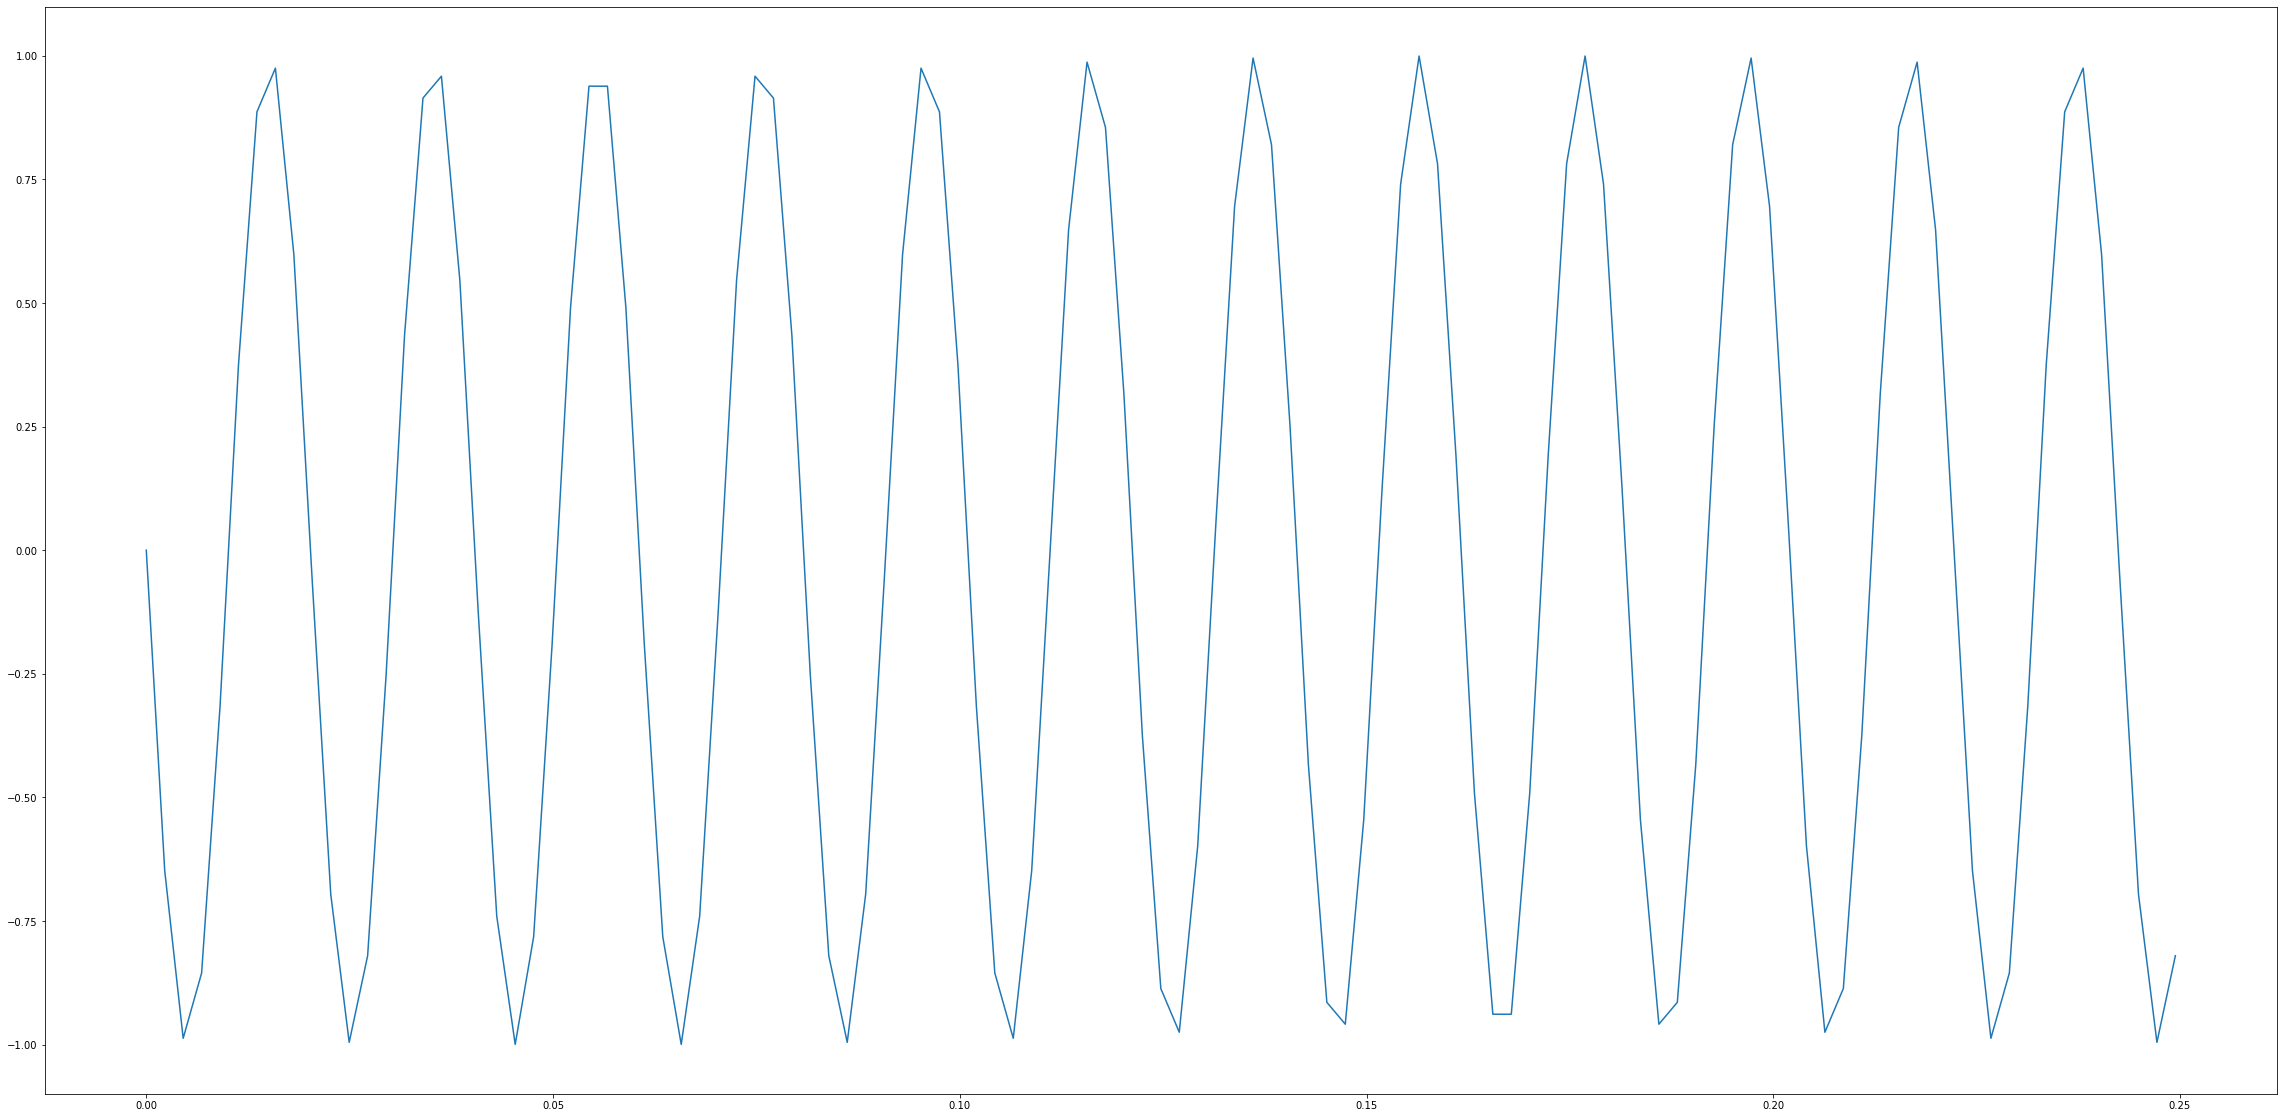

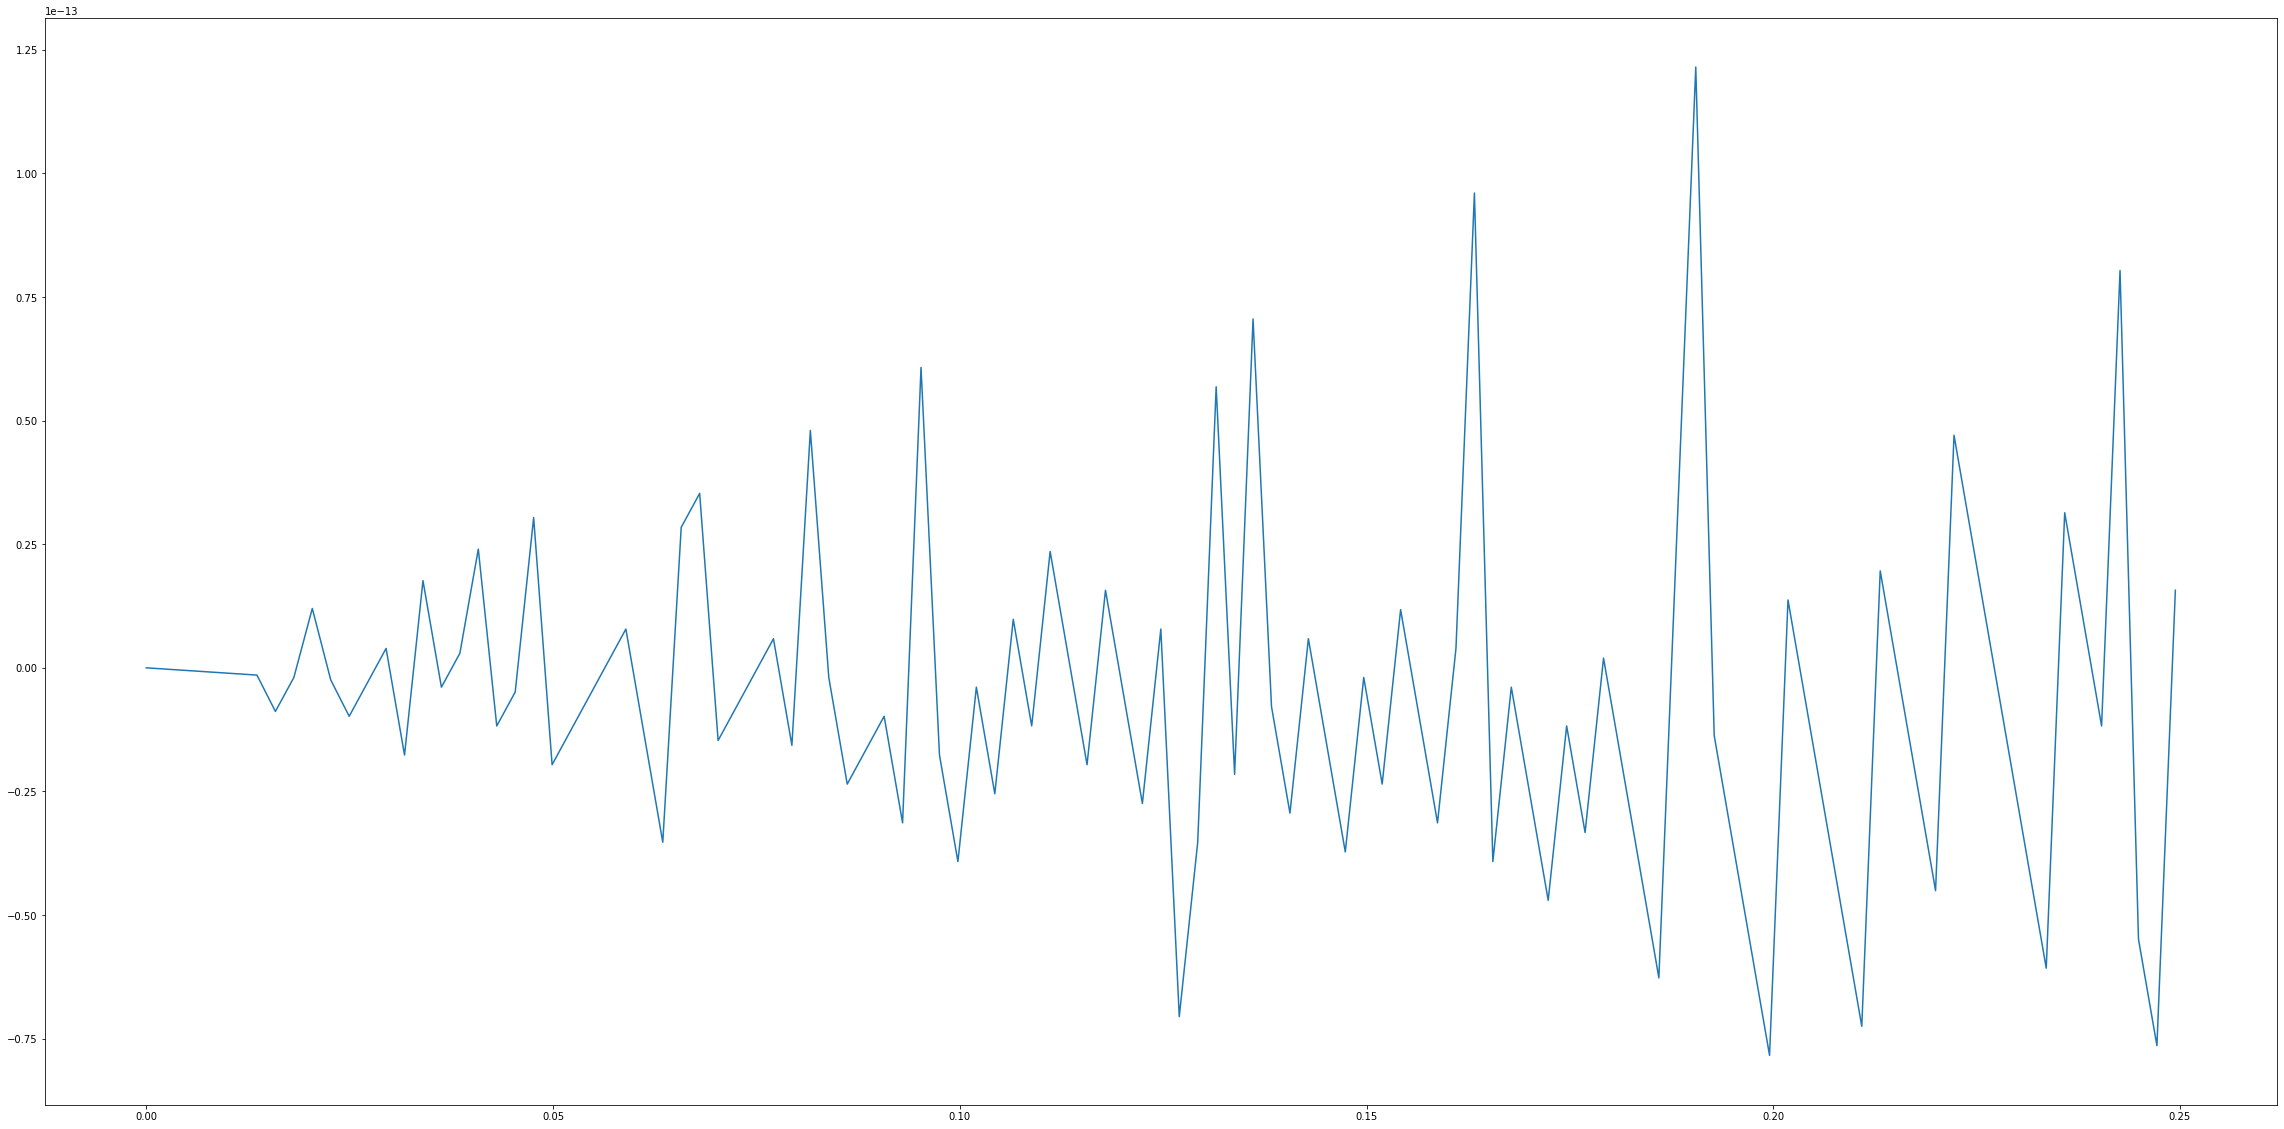

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,20))
plt.plot(t[::100], Sa_note[::100]);

plt.figure(figsize=(40,20))
plt.plot(t[::100], Re_note[::100]);

In [12]:
get_pause  = lambda seconds: repeat(0, int(seconds * sample_rate))

In [13]:
pause_note=list(get_pause(0.01))

In [14]:
sargam = np.hstack((pause_note,Sa_note,pause_note,Re_note,pause_note,Ga_note,
                   pause_note,Ma_note, pause_note,Pa_note, pause_note,
                    Dha_note, pause_note,Ni_note, pause_note, Sa1_note,pause_note))

In [15]:
type(sargam)

numpy.ndarray

In [16]:
sargam.shape

(92169,)

In [30]:
play_audio(sargam)
play_audio(sargam[::-1])

In [20]:
pip install wavio

In [21]:
import wavio
fs = 44100 
s2 = np.append(sargam,sargam[::-1])
wavio.write("pythonsargam.wav", s2, fs, scale=None,sampwidth=3)

In [24]:
import matplotlib.pyplot as plt

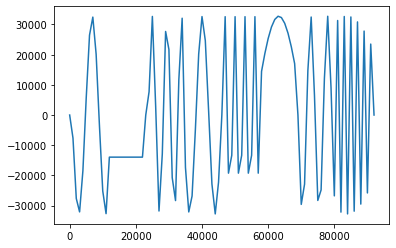

In [25]:
time = range(0,92169)
plt.plot(time[::1000], sargam[::1000])

In [26]:
sargam1 = np.hstack((Sa_note,Re_note,Ga_note,Ma_note,Pa_note,Dha_note,Ni_note, Sa1_note))

In [27]:
from scipy.fftpack import fft
 
X=fft(sargam1)

In [28]:
X.shape

(88200,)

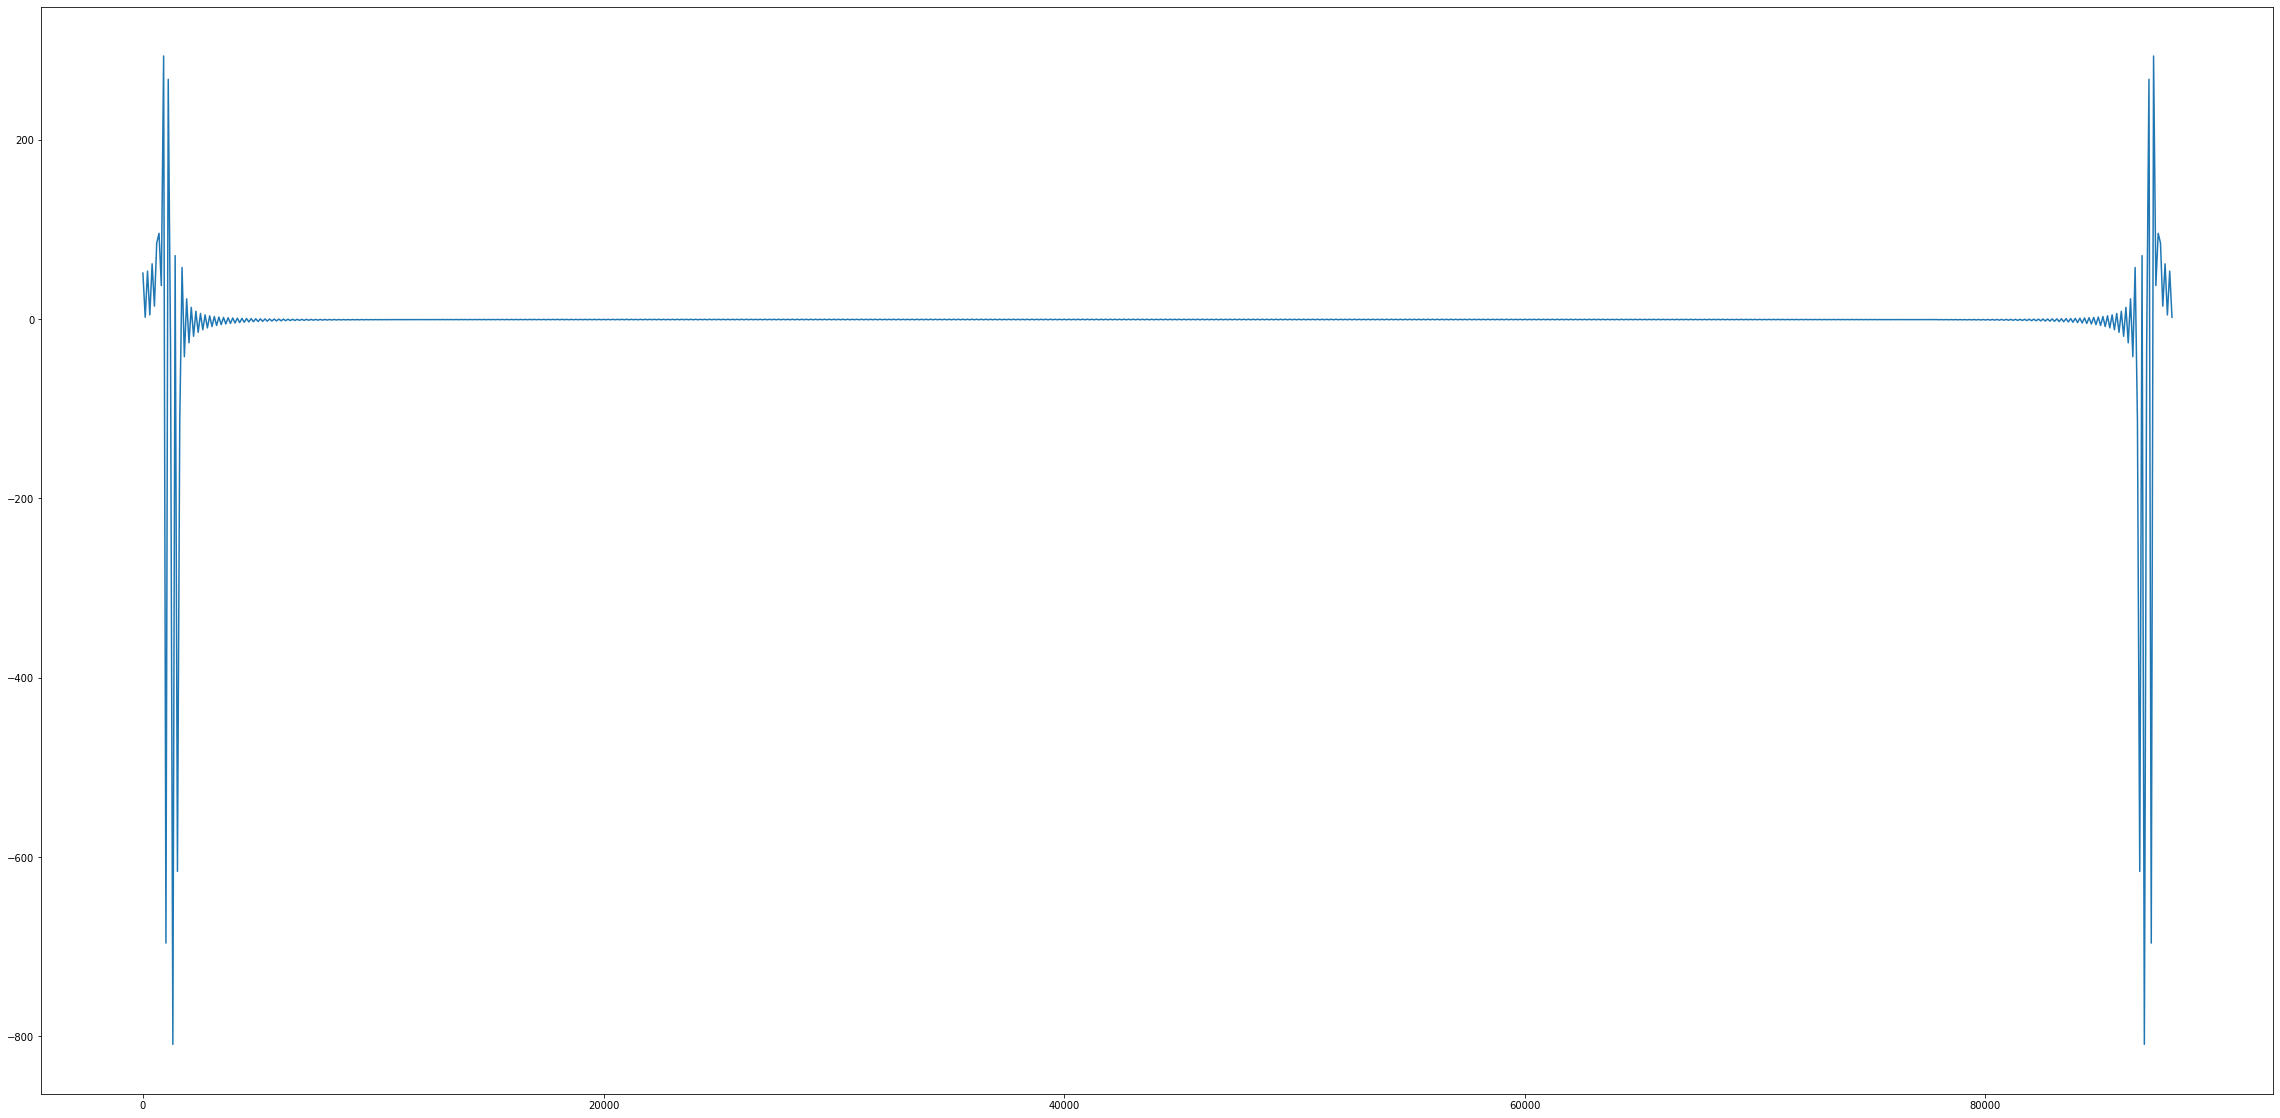

In [29]:
time1 = range(0,88200)

plt.figure(figsize=(40,20))
plt.plot(time1[::100], X[::100])